# Logistic Regression

### Same as Linear Regression except that we feed (compute y_pred which is mx+c) into sigmoid function to scale it between 0 and 1

#### Psuedocode :

##### iterate 
##### 1.)y_pred
##### 2.)sigmoid(y_pred)
##### 3.)Compute cost for logistic regression
##### 4.)Gradient ---> theta updates


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
X_train = pd.read_csv("train_X.csv")
Y_train = pd.read_csv("train_Y.csv")

X_test = pd.read_csv("test_X.csv")
Y_test = pd.read_csv("test_Y.csv")

In [3]:
X_train.head()

,Id,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,1
1,1,1,1,38.0,1,0,71.2833,0
2,2,3,1,26.0,0,0,7.9250,1
3,3,1,1,35.0,1,0,53.1000,1
4,4,3,0,35.0,0,0,8.0500,1


In [4]:
X_train=X_train.drop(["Id"], axis=1)
Y_train=Y_train.drop(["Id"], axis=1)
X_test=X_test.drop(["Id"], axis=1)
Y_test=Y_test.drop(["Id"], axis=1)

In [5]:
X_train = X_train.values.T
Y_train = Y_train.values.T
X_test = X_test.values.T
Y_test = Y_test.values.T

In [6]:
print("Shape of X_train : ", X_train.shape)
print("Shape of Y_train : ", Y_train.shape)
print("Shape of X_test : ", X_test.shape)
print("Shape of Y_test : ", Y_test.shape)
print(np.zeros(X_train.shape[1]).reshape((X_train.shape[1],1)).shape
)#=w
X_train.shape[1]

Shape of X_train :  (7, 891)
Shape of Y_train :  (1, 891)
Shape of X_test :  (7, 418)
Shape of Y_test :  (1, 418)
(891, 1)


891

In [7]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

In [8]:
def model(x,y,iteration,alpha):
    m=X_train.shape[1]#7
    n = X_train.shape[0]

    w = np.zeros((n,1))
    b = 0
    cost_list=[]
    for i in range(iteration):

        z=np.dot(w.T,x)+b
        a=sigmoid(z)
        # cost function
        cost=-(1/m)*(np.sum((y*np.log(a))+((1-y)*np.log(1-a))))

         # Gradient Descent
        dw=(1/m)*(np.dot((a-y),x.T))
        db=(1/m)*(np.sum(a-y))
        
        w=w-alpha*dw.T
        b=b-alpha*db

        # Keeping track of our cost function value
        cost_list.append(cost)
        if(i%(iteration/10) == 0):
            print("cost after ", i, "iteration is : ", cost)
    return w,b,cost_list

In [9]:
iterations = 200000
learning_rate = 0.0015
W, B, cost_list = model(X_train, Y_train,alpha = learning_rate, iteration = iterations)

cost after  0 iteration is :  0.6931471805599454
cost after  20000 iteration is :  0.46674868550665993
cost after  40000 iteration is :  0.45288994293089646
cost after  60000 iteration is :  0.4497708749009468
cost after  80000 iteration is :  0.4483412696612483
cost after  100000 iteration is :  0.44739812867237844
cost after  120000 iteration is :  0.44670482555288465
cost after  140000 iteration is :  0.44618205741707695
cost after  160000 iteration is :  0.44578570870101847
cost after  180000 iteration is :  0.44548487273486514


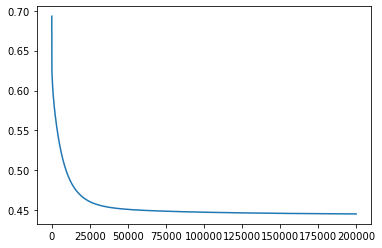

In [10]:
plt.plot(np.arange(iterations), cost_list)
plt.show()


# Testing Model Accuracy

In [11]:
def accuracy(x, y, w, b):
    
    Z = np.dot(W.T, x) + B
    A = sigmoid(Z)
    
    A = A > 0.5
    A = np.array(A, dtype = 'int64')
    print(A)
    accuracy = (1 - np.sum(np.absolute(A - y))/y.shape[1])*100
    
    print("Accuracy of the model is : ", round(accuracy, 2), "%")

In [12]:
accuracy(X_test, Y_test, W, B)

[[0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0
  0 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 0 1 0 0 1 1 0
  1 0 1 1 0 1 0 1 0 0 0 0 0 0 1 1 0 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0
  0 0 0 0 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0
  0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 1 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 1 1
  0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0
  0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 0 1 0
  1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0
  0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0
  1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1
  0 1 1 0 1 0 0 1 1 0 0 1 0 0 1 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 1
  0 1 0 0 1 0 1 1 0 0 0 0 0 1 0 1 1 0 1 0 0 0]]
Accuracy of the model is :  91.15 %


In [3]:
dim=5
w = np.zeros((dim,1))
w

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [10]:
a=np.array(  [  [1,1] , [1,-1]  ] )

b = np.array([[2], [3]])#b=np.array([[2],[3]])

c = a + b#c=a+b


In [15]:
c

array([[3, 3],
       [4, 2]])